In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto

import data_loader, model_builder

config = ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [11]:
# Create dataset
image_shape = (64, 64, 3)
batch_size=16
dataset = data_loader.ImageDataset(
                            image_width=image_shape[0],
                            image_height=image_shape[1])
batches = data_loader.dataset_to_batches(dataset,
                            batch_size=batch_size,
                            prefetch_size=5)

In [12]:
# Load the model
with open('models/generator.json') as json_file:
    generator = tf.keras.models.model_from_json(json_file.read())
generator.load_weights('models/generator.h5')

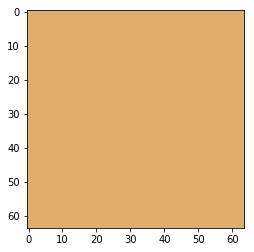

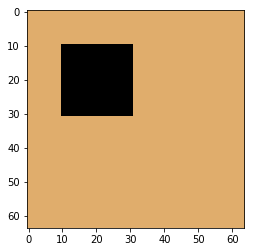

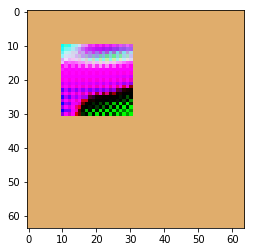

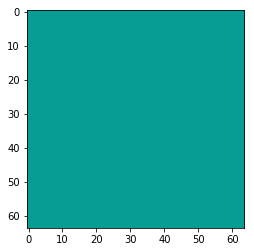

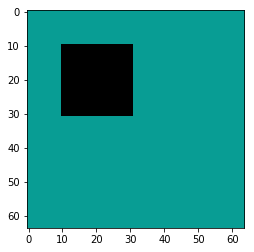

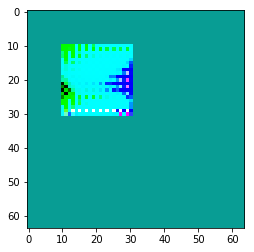

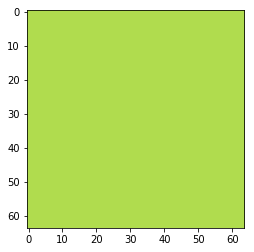

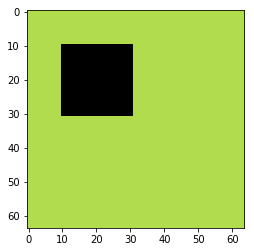

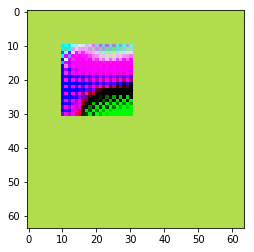

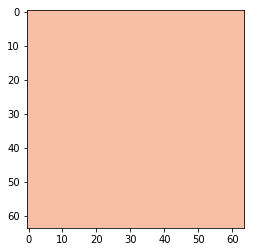

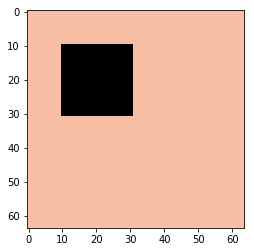

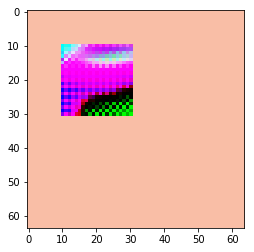

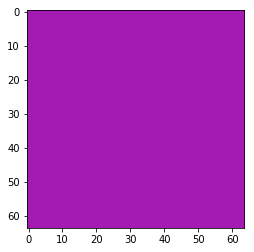

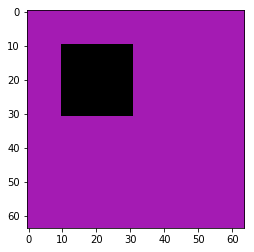

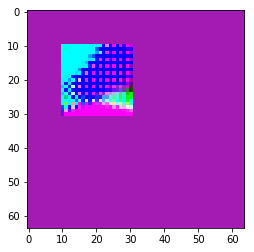

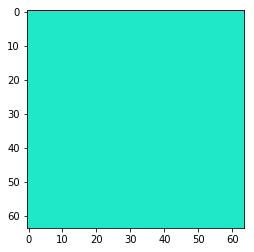

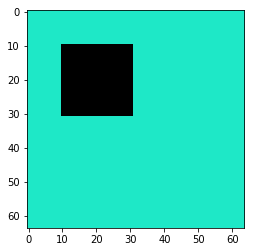

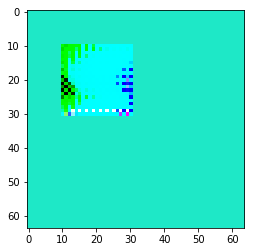

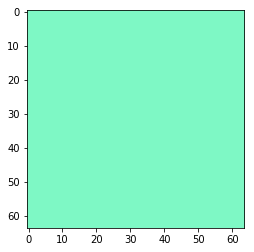

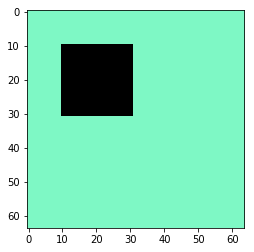

In [ ]:
# Get a batch of images
images, masks, masked_images = next(batches)

# Generate completed images
generated_images = generator.predict([images, masks])

# Show images
for i in range(batch_size):
    # Show original image
    plt.imshow(images[i])
    plt.show()
    # Show masked image
    plt.imshow(masked_images[i])
    plt.show()
    # Show generated image
    plt.imshow(generated_images[i])
    plt.show()